In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
train=pd.read_csv('train_titanic.csv', sep=',')
#train = train.dropna()
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
#df_train=df_train.dropna(subset=['Cabin']) Presenta muchos valores inciertos y cabinas combinadas- Se elimina la columna 529 lineas
#df_train["Cabin"].isnull().sum()

df_train=train[['PassengerId','Sex','Age','SibSp','Pclass','Parch','Fare','Embarked','Survived']]
df_train=df_train.dropna(subset=['Age','Embarked'])


#Tarifa es muy unica, aporta algun valor? Basados ejemplos vistos en clase, tranformaremos la variable pclass en diferentes columnas y eliminaremos la variable Fare
print("Minimo ",df_train["Fare"].min(),"Maximo ",df_train["Fare"].max())
df_train[df_train["Fare"]== 512.3292]

df_train=df_train[['PassengerId','Sex','Age','SibSp','Pclass','Parch','Embarked','Survived']]
df_train

Minimo  0.0 Maximo  512.3292


,PassengerId,Sex,Age,SibSp,Pclass,Parch,Embarked,Survived
0,1,male,22.0,1,3,0,S,0
1,2,female,38.0,1,1,0,C,1
2,3,female,26.0,0,3,0,S,1
3,4,female,35.0,1,1,0,S,1
4,5,male,35.0,0,3,0,S,0
...,...,...,...,...,...,...,...,...
885,886,female,39.0,0,3,5,Q,0
886,887,male,27.0,0,2,0,S,0
887,888,female,19.0,0,1,0,S,1
889,890,male,26.0,0,1,0,C,1


In [13]:
df_train['Age'] = df_train['Age'].astype(int)
df_train

,PassengerId,Sex,Age,SibSp,Pclass,Parch,Embarked,Survived
0,1,male,22,1,3,0,S,0
1,2,female,38,1,1,0,C,1
2,3,female,26,0,3,0,S,1
3,4,female,35,1,1,0,S,1
4,5,male,35,0,3,0,S,0
...,...,...,...,...,...,...,...,...
885,886,female,39,0,3,5,Q,0
886,887,male,27,0,2,0,S,0
887,888,female,19,0,1,0,S,1
889,890,male,26,0,1,0,C,1


In [14]:
df_train_sex=pd.get_dummies(df_train['Sex'])
df_train_sex['PassengerId']=df_train['PassengerId']
df_train_sex=df_train_sex[['PassengerId','female','male']]
df_train=df_train.merge(df_train_sex, how='inner')


In [15]:
df_train_pclass=df_train.groupby(['Pclass']).agg('count')


In [16]:
df_train_pclass_survived=df_train.groupby(['Pclass']).Survived.agg('sum')


In [17]:
class_survive={'Pclass':df_train_pclass['PassengerId'],'Survived_pclass':df_train_pclass_survived}
class_survive=pd.DataFrame(class_survive)
class_survive['Porcentaje_%']=class_survive['Survived_pclass']/class_survive['Pclass']
class_survive

,Pclass,Survived_pclass,Porcentaje_%
Pclass,,,
1,184,120,0.652174
2,173,83,0.479769
3,355,85,0.239437


<AxesSubplot:xlabel='Pclass'>

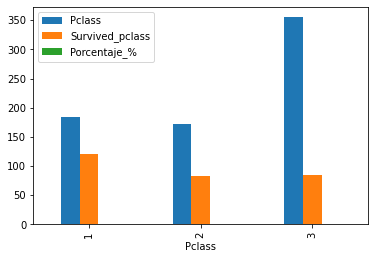

In [18]:
class_survive.plot.bar()

In [19]:
df_train_embarked=df_train.groupby(['Embarked','Pclass']).agg('count')


In [20]:
df_train_embarked_survived=df_train.groupby(['Embarked','Pclass']).Survived.agg('sum')


In [21]:
df_train_embark_survived=df_train.groupby(['Embarked']).agg('count')['PassengerId']
df_train_embark_survived

Embarked
C    130
Q     28
S    554
Name: PassengerId, dtype: int64

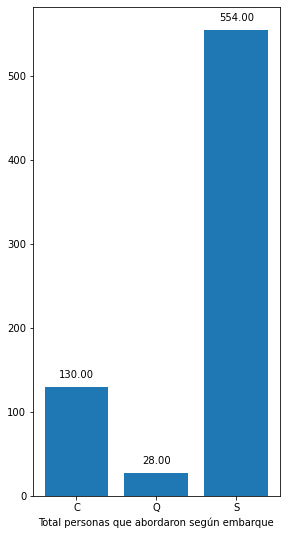

In [22]:
names=['C','Q','S']
plt.figure(figsize=(15, 9))
plt.subplot(131)
plt.bar(names, df_train_embark_survived)
for x,y in zip(names,df_train_embark_survived):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,9), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xlabel('Total personas que abordaron según embarque')
plt.show()

In [23]:
df_train_embark_survived=df_train.groupby(['Embarked']).Survived.agg('sum')
df_train_embark_survived

Embarked
C     79
Q      8
S    201
Name: Survived, dtype: int64

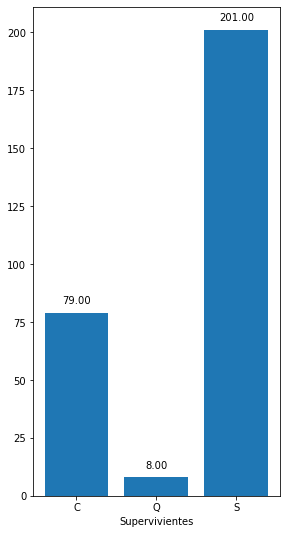

In [24]:
names=['C','Q','S']
plt.figure(figsize=(15, 9))
plt.subplot(131)
plt.bar(names, df_train_embark_survived)
for x,y in zip(names,df_train_embark_survived):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,9), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xlabel('Supervivientes')
plt.show()

In [25]:
embarked_survive_byclass={'Pclass':df_train_embarked['PassengerId'],'Survived_pclass':df_train_embarked_survived}
embarked_survive_byclass=pd.DataFrame(embarked_survive_byclass)
embarked_survive_byclass['Porcentaje_%']=embarked_survive_byclass['Survived_pclass']/embarked_survive_byclass['Pclass']
embarked_survive_byclass

Pclass  Survived_pclass  Porcentaje_%
Embarked Pclass                                       
C        1           74               53      0.716216
         2           15                8      0.533333
         3           41               18      0.439024
Q        1            2                1      0.500000
         2            2                1      0.500000
         3           24                6      0.250000
S        1          108               66      0.611111
         2          156               74      0.474359
         3          290               61      0.210345

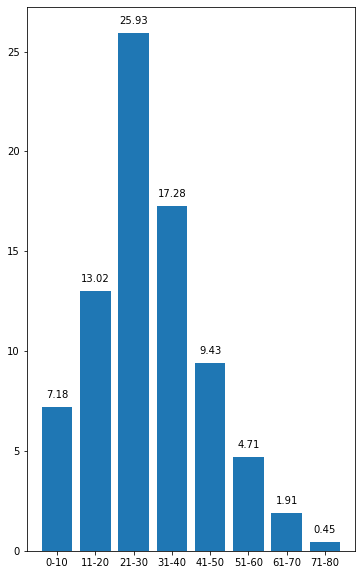

In [26]:
df_10=0
df_19=0
df_30=0
df_40=0
df_50=0
df_60=0
df_70=0
df_80=0
value=[]
for i in df_train['Age']:
    if i >=0 and i <=10:
        df_10=df_10+1   
    elif  i >10 and i <=20:
        df_19=df_19+1
    elif i >=21 and i <=30:
        df_30=df_30+1
    elif i >=31 and i <=40:
        df_40=df_40+1    
    elif i >=41 and i <=50:
        df_50=df_50+1
    elif  i >=51 and i <=60:
        df_60=df_60+1 
    elif  i >=61 and i <=70:
        df_70=df_70+1
    elif  i >=71 and i <=80:
        df_80=df_80+1
        
value.append(df_10)
value.append(df_19)
value.append(df_30)
value.append(df_40)
value.append(df_50)
value.append(df_60)
value.append(df_70)
value.append(df_80)
values=[]

names=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
for i in value:
    values.append((i/891)*100)

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.bar(names, values)
for x,y in zip(names,values):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,9), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()
          
    

In [27]:
df_10=df_train[df_train['Age'].between(0,10, 'both')].groupby(['Survived']).agg('count')['PassengerId']
df_20=df_train[df_train['Age'].between(11,20, 'both')].groupby(['Survived']).agg('count')['PassengerId']
df_30=df_train[df_train['Age'].between(21,30, 'both')].groupby(['Survived']).agg('count')['PassengerId']
df_40=df_train[df_train['Age'].between(31,40, 'both')].groupby(['Survived']).agg('count')['PassengerId']
df_50=df_train[df_train['Age'].between(41,50, 'both')].groupby(['Survived']).agg('count')['PassengerId']
df_60=df_train[df_train['Age'].between(51,60, 'both')].groupby(['Survived']).agg('count')['PassengerId']
df_70=df_train[df_train['Age'].between(61,70, 'both')].groupby(['Survived']).agg('count')['PassengerId']
df_80=df_train[df_train['Age'].between(71,80, 'both')].groupby(['Survived']).agg('count')['PassengerId']
data=pd.DataFrame({'Survived_0_10:': df_10,'Survived_11_20:': df_20,'Survived_21_30:': df_30,'Survived_31_40:': df_40,'Survived_41_50:': df_50,'Survived_51_60:': df_60,'Survived_61_70:': df_70,'Survived_71_80:': df_80})


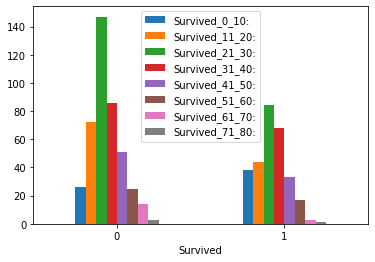

In [28]:
ax =data.plot.bar(rot=0)


In [29]:
df_total_female=df_train[df_train['female']==1].agg('count')['PassengerId']


In [30]:
df_female=df_train[df_train['female']==1].groupby(['Survived']).agg('count')['PassengerId']
df_female

Survived
0     64
1    195
Name: PassengerId, dtype: int64

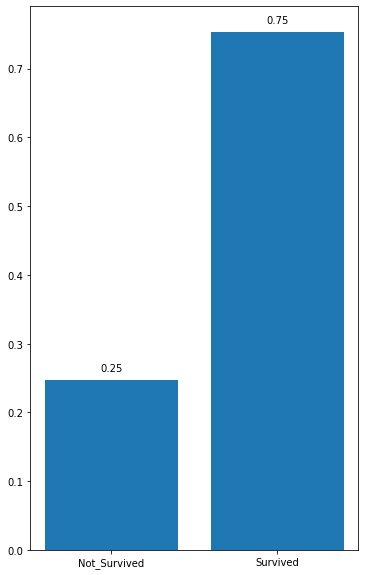

In [31]:
data_female=[]
for i in df_female:
    data_female.append(i/df_total_female)
names=['Not_Survived','Survived']
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.bar(names, data_female)
for x,y in zip(names,data_female):

    label = "{:.2f}".format(y)

    plt.annotate(label,(x,y),textcoords="offset points", xytext=(0,9), ha='center')
plt.show()

In [32]:
df_total_male=df_train[df_train['male']==1].agg('count')['PassengerId']


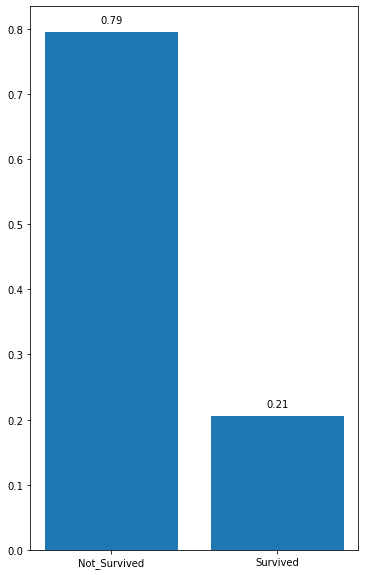

In [33]:
df_male=df_train[df_train['male']==1].groupby(['Survived']).agg('count')['PassengerId']
data_male=[]
for i in df_male:
    data_male.append(i/df_total_male)
names=['Not_Survived','Survived']
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.bar(names, data_male)
for x,y in zip(names,data_male):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,9), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [34]:
df_train

,PassengerId,Sex,Age,SibSp,Pclass,Parch,Embarked,Survived,female,male
0,1,male,22,1,3,0,S,0,0,1
1,2,female,38,1,1,0,C,1,1,0
2,3,female,26,0,3,0,S,1,1,0
3,4,female,35,1,1,0,S,1,1,0
4,5,male,35,0,3,0,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...
707,886,female,39,0,3,5,Q,0,1,0
708,887,male,27,0,2,0,S,0,0,1
709,888,female,19,0,1,0,S,1,1,0
710,890,male,26,0,1,0,C,1,0,1


In [35]:
df_train2=pd.get_dummies(df_train['Pclass'])
df_train2.rename(columns={1:"Pclass_1",2:"Pclass_2",3:"Pclass_3"}, inplace=True)
df_train2["PassengerId"] = df_train["PassengerId"]

df_train3=pd.get_dummies(df_train['Embarked'])
df_train3.rename(columns={"C":"embarked_C","Q":"embarked_Q", "S":"embarked_S"}, inplace=True)
df_train3["PassengerId"] = df_train["PassengerId"]

df_train = df_train.merge(df_train2, how="inner").merge(df_train3, how="inner")
df_train = df_train.drop(columns=['Sex', 'Pclass', 'Embarked'])



In [36]:
df_train = df_train[['PassengerId', 'Age', 'SibSp', 'Parch', 'female', 'male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'embarked_C', 'embarked_Q',
       'embarked_S', 'Survived']]
df_train

,PassengerId,Age,SibSp,Parch,female,male,Pclass_1,Pclass_2,Pclass_3,embarked_C,embarked_Q,embarked_S,Survived
0,1,22,1,0,0,1,0,0,1,0,0,1,0
1,2,38,1,0,1,0,1,0,0,1,0,0,1
2,3,26,0,0,1,0,0,0,1,0,0,1,1
3,4,35,1,0,1,0,1,0,0,0,0,1,1
4,5,35,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,886,39,0,5,1,0,0,0,1,0,1,0,0
708,887,27,0,0,0,1,0,1,0,0,0,1,0
709,888,19,0,0,1,0,1,0,0,0,0,1,1
710,890,26,0,0,0,1,1,0,0,1,0,0,1


Analisis de modelos a utilizar
1. Regression Lineal
2. Boosting
3. Random Forest

In [37]:
X = df_train[[ 'Age', 'SibSp', 'Parch', 'female', 'male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'embarked_C', 'embarked_Q',
       'embarked_S']]
y = df_train['Survived']

In [54]:
from seaborn import scatterplot
from seaborn import regplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

Linear Regression

In [99]:
LinearAccuracyFinal = 0
for folds in range(1,6):
    x_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    LinearAccuracy = reg.score(X_test,y_test)
    if(LinearAccuracy > LinearAccuracyFinal):
        LinearAccuracyFinal = LinearAccuracy

print('Final Accuracy: ',LinearAccuracyFinal)

Final Accuracy:  0.45527881707632334


Random Forest

In [93]:
AccurateMaxDepth = 0
RandomAccuracyFinal = 0
for folds in range(1,6):
    x_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    for maxDepths in range(1,11):
        RandomModel = RandomForestClassifier(n_estimators = 100, max_depth=maxDepths, random_state=1)
        RandomModel.fit(x_train,y_train)
        RandomForestAccuracy = RandomModel.score(X_test,y_test)
        if(RandomForestAccuracy>RandomAccuracyFinal):
            RandomAccuracyFinal = RandomForestAccuracy
            AccurateMaxDepth = maxDepths

print('Max Depth: ',AccurateMaxDepth)
print('Final Accuracy: ',RandomAccuracyFinal)

Max Depth:  5
Final Accuracy:  0.8321678321678322


Boosting Model

In [98]:
BoostAccurateMaxDepth = 0
BoostAccuracyFinal = 0
for folds in range(1,6):
    x_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    for maxDepths in range(1,11):
        BoostModel = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=maxDepths, random_state=1)
        BoostModel.fit(x_train,y_train)
        BoostAccuracy = BoostModel.score(X_test,y_test)
        if(BoostAccuracy>BoostAccuracyFinal):
            BoostAccuracyFinal = BoostAccuracy
            BoostAccurateMaxDepth = maxDepths

print('Max Depth: ',BoostAccurateMaxDepth)
print('Final Accuracy: ',BoostAccuracyFinal)        

Max Depth:  1
Final Accuracy:  0.8391608391608392
